##Miscelaneas Funciones

In [ ]:
#https://note.nkmk.me/en/python-opencv-hconcat-vconcat-np-tile/
def vconcat_resize_min(im_list, interpolation=cv2.INTER_CUBIC):
    w_min = min(im.shape[1] for im in im_list)
    im_list_resize = [cv2.resize(im, (w_min, int(im.shape[0] * w_min / im.shape[1])), interpolation=interpolation)
                      for im in im_list]
    return cv2.vconcat(im_list_resize)
def hvconcat_resize_min(im_list, interpolation=cv2.INTER_CUBIC):
    w_min = min(im.shape[1] for im in im_list)
    im_list_resize = [cv2.resize(im, (w_min, int(im.shape[0] * w_min / im.shape[1])), interpolation=interpolation)
                      for im in im_list]
    return cv2.hvconcat(im_list_resize)



##Histograma de una imagen

Un histograma es una gráfica en donde se muestra la frecuencia con las que aparecen los distintos niveles de intensidad de una imagen a escala de grises, normalmente el nivel de intensidad está en el rango de 0 a 255, en donde el valor 0 representa los color negro y 255 el color blanco, utilizando el histograma de una imagen podemos modificar sus características, por ejemplo, el brillo y contraste, existen además otras aplicaciones que veremos más adelante.

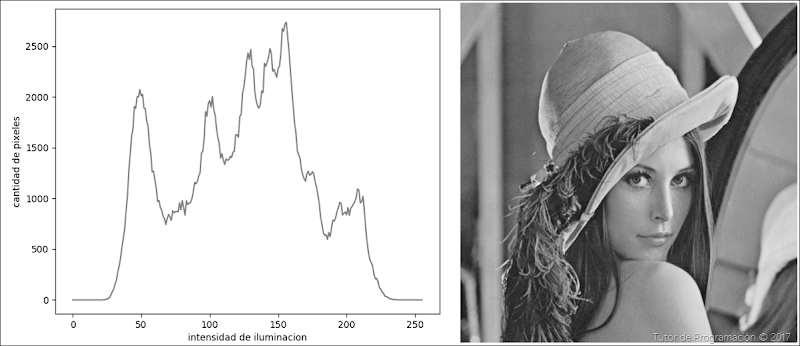

Para el calculo de histogramas OpenCV nos proporciona la función cv2.calcHist() para dicho propósito, esta se define de la siguiente manera:

`cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]`

Debemos indicar los siguientes parámetros:

* **images:** imagen de estrada, puede ser a escala de grises o colores.
* **channels:** índice de canal para el cual deseamos calcular el histograma, en una imagen a escala de grises [0], si la imagen es a colores podemos indicar [0], [1], [2] para los canales B, G, R respectivamente.
* **mask:** mascara que define la región sobre la que deseamos calcular el histograma, es opcional.
* **histSize:** intensidad máxima, para nosotros [256].
* **ranges:** nuestro rango de valores, usaremos [0, 256].

**Calcular histograma de imagen Gris**

La parte ha resaltar del código, el calculo del histograma usando la función cv2.calcHist(), luego graficamos el resultado usando el método plot(hist), como podemos ver le pasamos el resultado obtenido previamente, mostramos la gráfica con show().

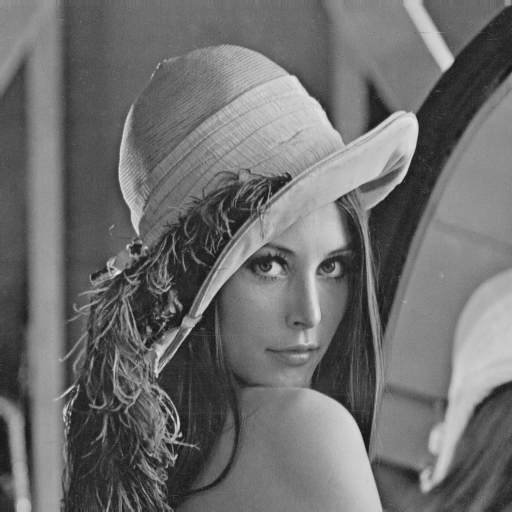

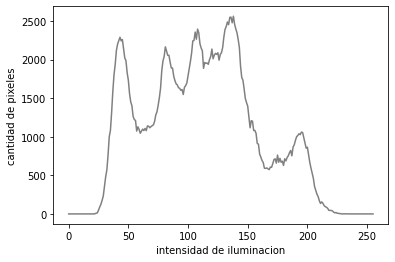

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
lena = "lena_std.tif"
img = cv2.imread(lena, cv2.IMREAD_GRAYSCALE)
#cv2.imshow("Lena", img)
cv2_imshow(img)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='gray' )

plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

#cv2.destroyAllWindows()

**Calcular histograma de imagen a color**

También es posible calcular el histograma de una imagen a color, lo que obtenemos es una gráfica que muestra la frecuencia con la que aparecen los distintos niveles de cada uno de los canales, azul, verde y rojo, el código es similar al anterior, solo debemos asegurarnos de recorrer y calcular cada uno de los histogramas para cada canal.

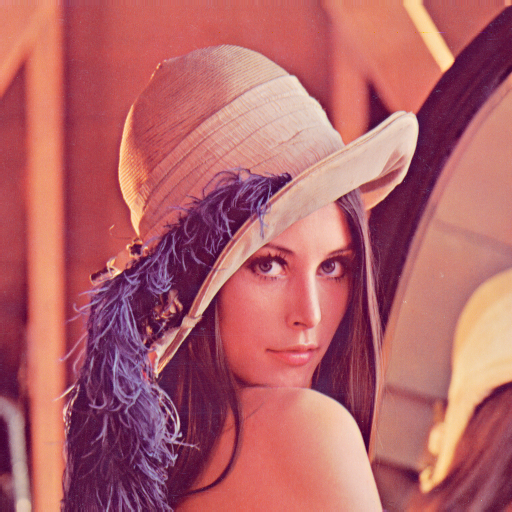

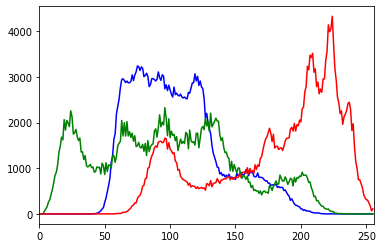

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
lena = "lena_std.tif"

img = cv2.imread(lena)
#cv2.imshow('lena.jpg', img)
cv2_imshow(img)
color = ('b','g','r')

for i, c in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])

plt.show()

#cv2.destroyAllWindows()


**Resumen del ejemplo**

In [ ]:
imagen = 'manzana_roja.jpg'
from google.colab.patches import cv2_imshow

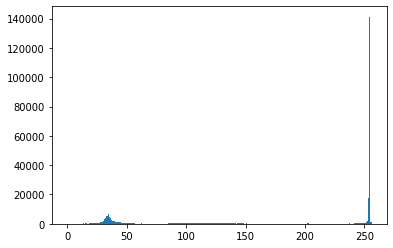

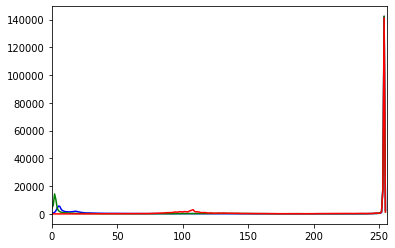

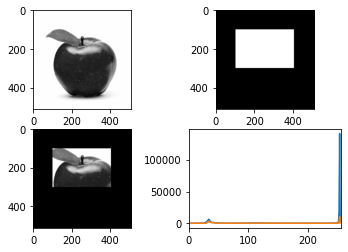

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Utilizando Matplotlib
# Imprimir el histograma de una imagen (en escala de grises)
img = cv2.imread(imagen,0)
# ravel() regresa la matriz como un vector plano
# se envía el número de barras (256)
# y que intervalo se va a manejar
plt.hist(img.ravel(),256,[0,256]); plt.show()

# Para el caso de las imágenes BGR
img = cv2.imread(imagen)
color = ('b','g','r')
for i,col in enumerate(color):
    # caclHist(images, canales, máscara, histSize, ranges)
    # máscara, aplica una máscara sobre cierta porción de la imagen, si se desea obtener de toda la imagen, se coloca None
    # binSize or histSize
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


# Utilizando openCV
img = cv2.imread(imagen,0)
# Crear una máscara
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calcular el histograma con y sin máscara
# Verificar el tercer argumento para la máscara
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, cmap = 'gray')
plt.subplot(222), plt.imshow(mask, cmap = 'gray')
plt.subplot(223), plt.imshow(masked_img, cmap = 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

##Normalización del histograma de la *imagen*

**1. Normalización del histograma**

Los píxeles de algunas imágenes en escala de grises no se distribuyen en [0,255], sino en subintervalos de [0,255]. A menudo, estas imágenes no son muy claras a simple vista. Podemos normalizar el histograma para cambiar su distribución de píxeles desde el subintervalo de [0,255] al rango de [0,255]. De esta manera, a menudo se puede aumentar la claridad de la imagen.

Esta operación de histograma normalizada se denomina transformación de escala de grises (Transformación de escala de grises). El algoritmo para convertir el rango de valores de píxeles de [c, d] a [a, b] es el siguiente:



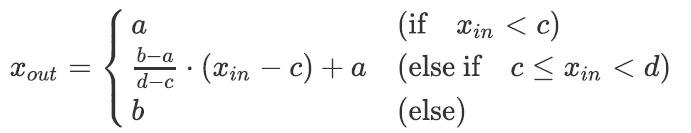

###Experimento:

normalice el histograma de una imagen con un rango de grises de [10,160] para hacer el rango de grises de [0,255]

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
# histogram normalization
def hist_normalization(img, a=0, b=255):
	# get max and min
	c = img.min()
	d = img.max()
 
	out = img.copy()
 
	# normalization
	out = (b-a) / (d - c) * (out - c) + a
	out[out < a] = a
	out[out > b] = b
	out = out.astype(np.uint8)
	
	return out
 
# Read image
img = cv2.imread("./head_g_n.jpg",0).astype(np.float)
in_img = cv2.imread("./head_g_n.jpg")
in_img_gray= cv2.cvtColor(in_img,cv2.COLOR_BGR2GRAY)
# histogram normalization
out = hist_normalization(img)
 


Histograma de distribución de píxeles de la imagen original [10,160]

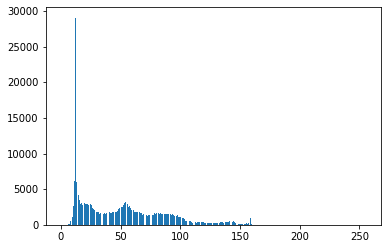

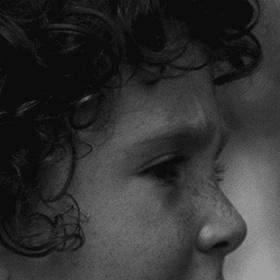

In [ ]:
# Display histogram
plt.hist(in_img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("in_his.jpg")
plt.show()
 
cv2_imshow(in_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

Se puede ver que después de normalizar el histograma de la imagen con el rango de grises de [10,160] a [0,255], la nitidez de la imagen se mejora significativamente

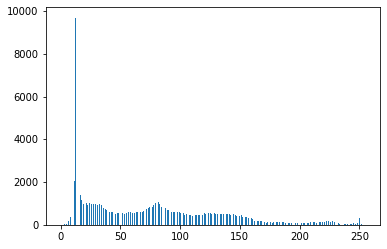

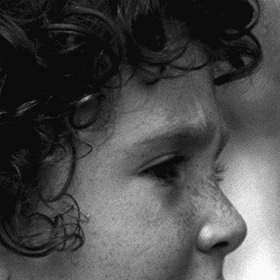

In [ ]:
# Display histogram
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("out_his.jpg")
plt.show()
 
# Save result
#cv2.imshow("result", out)
#cv2.imshow("result", out)
cv2.imwrite("out.jpg", out)
#final_frame = cv2.hconcat((in_img, out))
#cv2_imshow(final_frame)
cv2_imshow(out)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

**Resumen:**

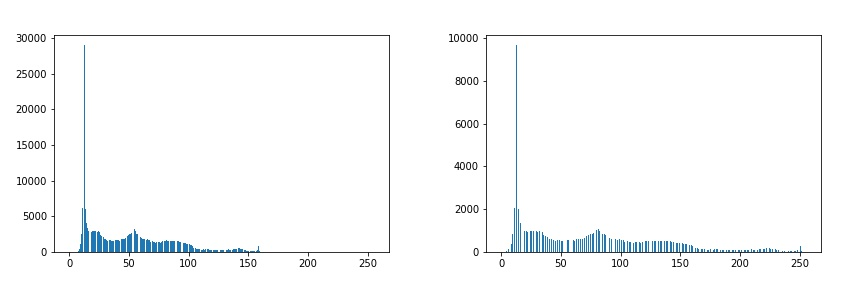

In [ ]:
hist = cv2.hconcat([cv2.imread("./in_his.jpg"), cv2.imread("./out_his.jpg")])
cv2_imshow(hist)

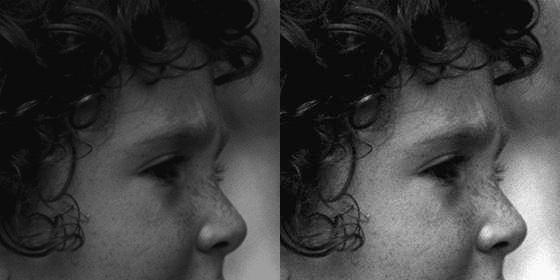

In [ ]:
image = cv2.hconcat([in_img_gray, out])
cv2_imshow(image)

##Ecualización de histogramas


La ecualización de histograma busca obtener una distribución uniforme de los distintos niveles de intensidad, esta técnica es muy utilizada para mejorar el contraste de las imágenes.

Para aplicar la ecualización de histograma OpenCV nos provee la función cv2.equalizeHist(src) solo debemos pasarle la imagen de estrada, la función nos retorna la imagen ecualizada.



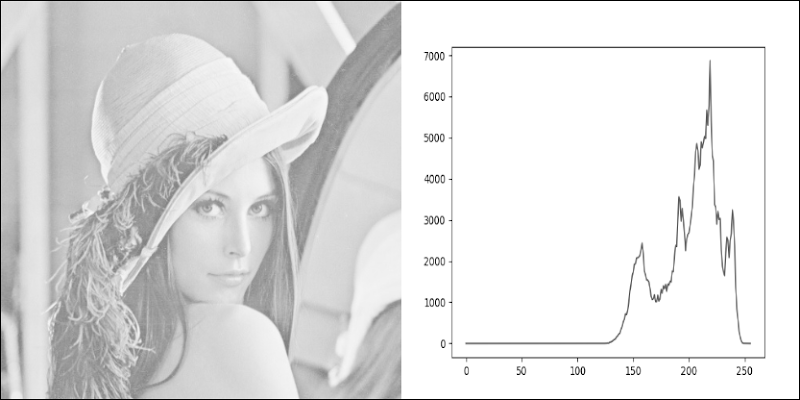

Podemos observar que la imagen está bastante clara, tiene mucho brillo, si vemos el histograma podremos ver que la mayoría de los pixeles son blancos, en la siguiente imagen vemos el caso contrario, la imagen tiene poca luz, está oscura.



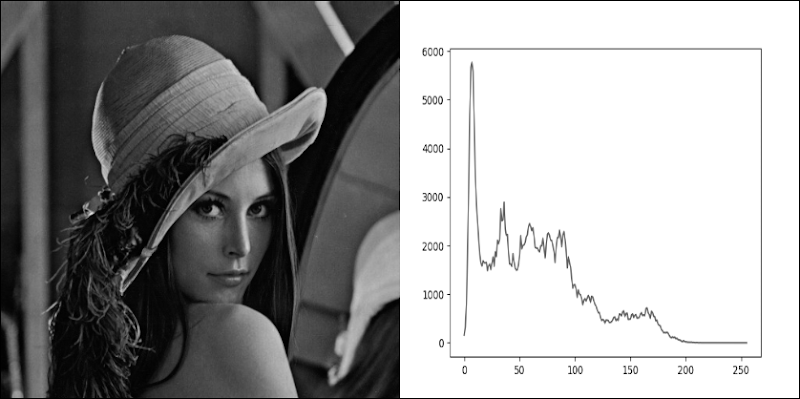

Ahora la mayor concentración de pixeles está en el nivel de intensidad cercano a 0 es decir el color negro.

Usando la ecualización de histogramas podemos mejorar ambas imágenes, veamos el código:

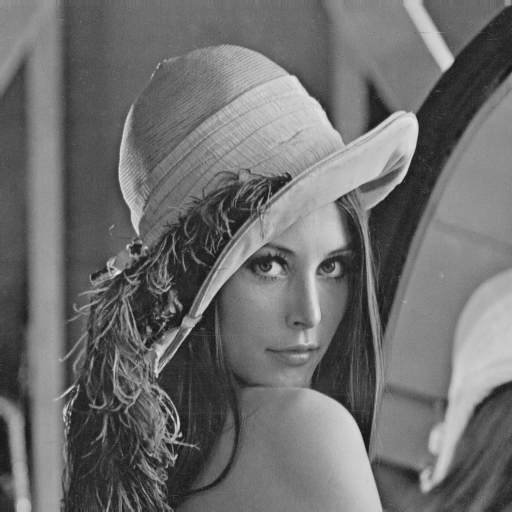

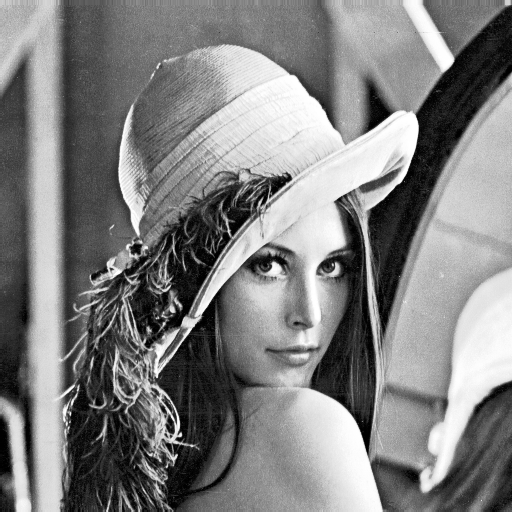

In [ ]:
import cv2

lena = "lena_std.tif"

img = cv2.imread(lena, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
img = cv2.equalizeHist(img)

#cv2.imshow('Histogramas', img)
#cv2.waitKey()
cv2_imshow(img)

Aplicación Completa

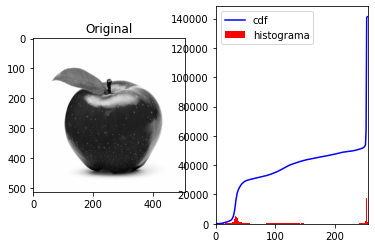

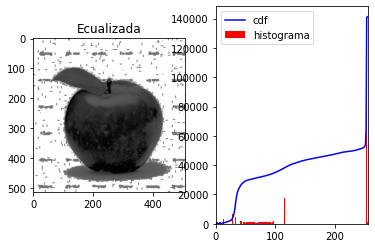

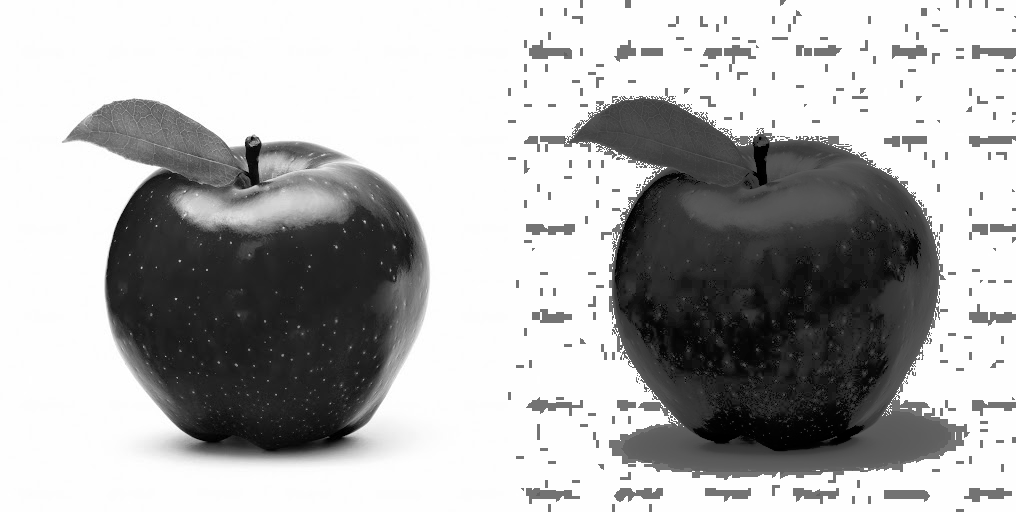

In [ ]:
imagen = 'manzana_roja.jpg'
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(imagen,0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

# Obtener la FDA del histograma
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.subplot(121)
plt.imshow(img, cmap = 'gray'),plt.title('Original')
plt.subplot(122)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histograma'), loc = 'upper left')
plt.show()

# Ecualizar el histograma
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

'''
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf_normalized = cdf * hist.max()/ cdf.max()
'''

plt.subplot(121)
plt.imshow(img2, cmap = 'gray'),plt.title('Ecualizada')
plt.subplot(122)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histograma'), loc = 'upper left')
plt.show()


# Usando OpenCV
img = cv2.imread(imagen,0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ))
# cv2_imshow('Ecualizadas', res)
cv2_imshow(res)
# Esperar una tecla y recibirla en la variable
# cv2.waitKey(0)

# Ecualización del Histograma Adpatativo Limitado por Contraste (CLAHE)

# Crear un objeto CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

# cv2_imshow('CLAHE', cl1)
# cv2_imshow(cl1)
# Esperar una tecla y recibirla en la variable
# cv2.waitKey(0)

##Binarización por umbral

La segmentación de umbral de imagen es un proceso de preprocesamiento de imágenes necesario antes del análisis de imágenes, extracción de características y reconocimiento de patrones. El propósito del umbral de la imagen es dividir el conjunto de píxeles de acuerdo con el nivel de gris, y cada uno de los subconjuntos obtenidos forma un área correspondiente a la escena real. Cada área tiene los mismos atributos, mientras que las áreas adyacentes no tienen este Atributos consistentes.

Para cada píxel, se aplica el mismo umbral. Si el valor de píxel es menor que el umbral, se establece en 0; de lo contrario, se establece en el valor máximo. La función cv.threshold se utiliza para aplicar un umbral. 

`ret, dst = cv2.threshold(src, umbral, maxval, type)`

Ejemplo:

`ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)`


* src: imagen de entrada, solo se puede ingresar una imagen de un solo canal, generalmente imagen en escala de grises
* umbral: umbral, que se utiliza para clasificar los valores de los píxeles
* maxval: cuando el valor del píxel excede el umbral (o menor que el umbral, determinado por tipo), el valor asignado
* tipo: El tipo de operación binaria, incluidos los siguientes 5 tipos: cv2.THRESH_BINARY; cv2.THRESH_BINARY_INV; cv2.THRESH_TRUNC; cv2.THRESH_TOZERO; cv2.THRESH_TOZERO_INV

Estas funciones tienen dos valores de retorno: el primer valor de retorno es el umbral utilizado y el segundo es la imagen después del umbral(gráfico de salida).



###Umbralización Simple

original


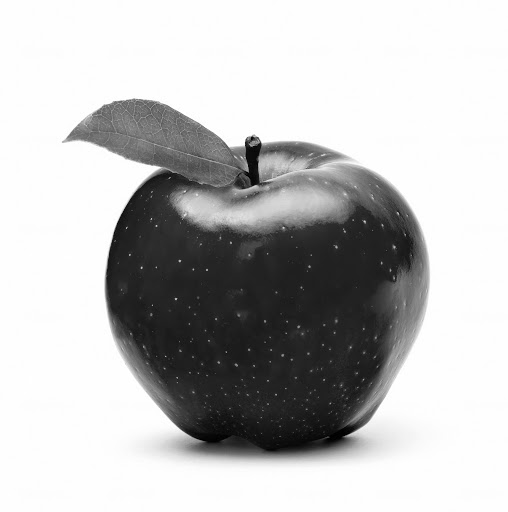

tres1


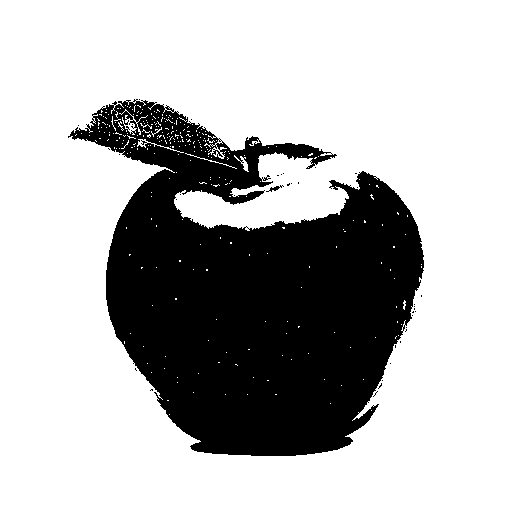

tres2


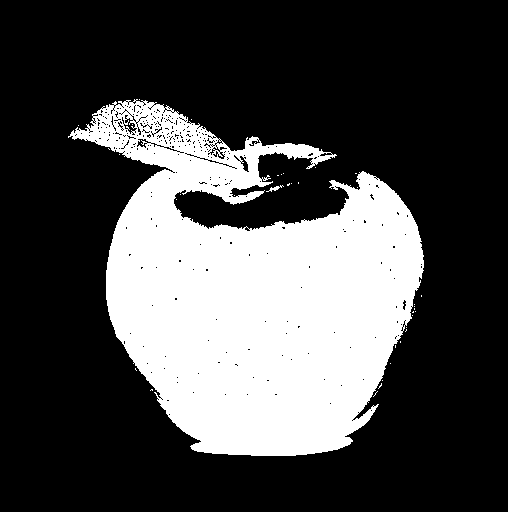

tres3


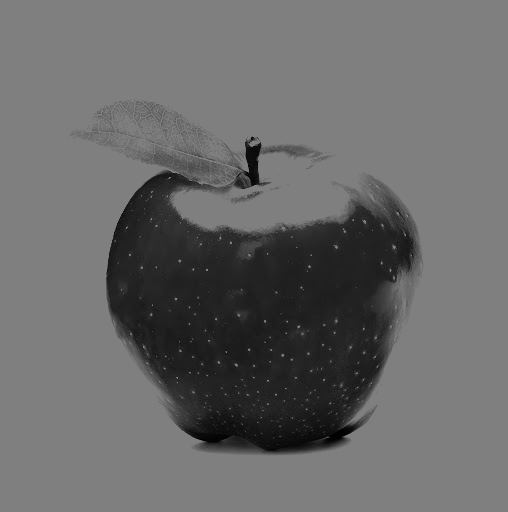

tres4


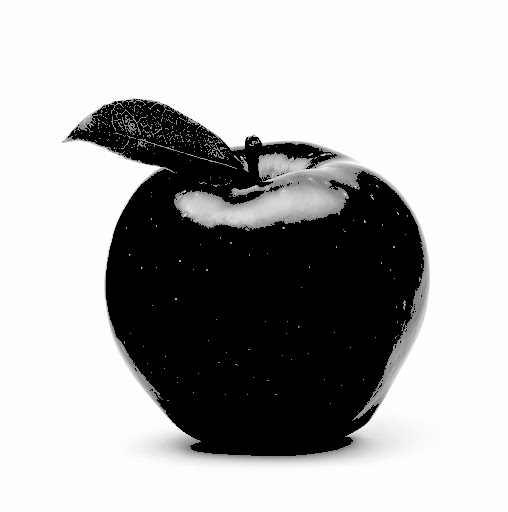

tres5


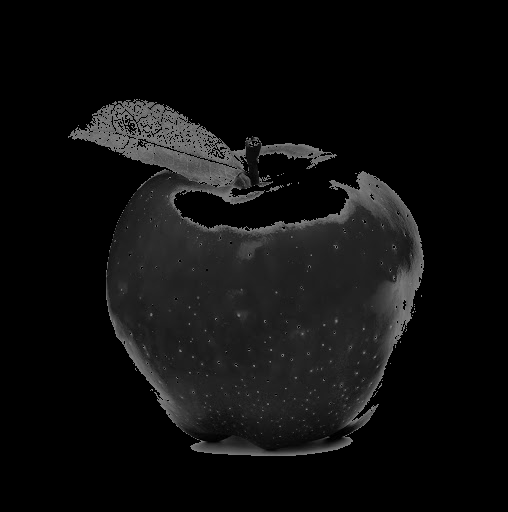

"\ntitles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']\nimages = [img, thresh1, thresh2, thresh3, thresh4, thresh5]\n\nfor i in xrange(6):\n    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')\n    plt.title(titles[i])\n    plt.xticks([]),plt.yticks([])\n\nplt.show()\n"

In [ ]:
imagen = 'manzana_roja.jpg'
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
#from matplotlib import pyplot as plt

img = cv2.imread(imagen,0)
# Umbralización
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

print('original')
cv2_imshow(img)
print('THRESH_BINARY')
cv2_imshow(thresh1)
print('THRESH_BINARY_INV')
cv2_imshow(thresh2)
print('THRESH_TRUNC')
cv2_imshow(thresh3)
print('THRESH_TOZERO')
cv2_imshow(thresh4)
print('THRESH_TOZERO_INV')
cv2_imshow(thresh5)



# cv2_imshow('original', img)
# cv2.imshow('tres1', thresh1)
# cv2.imshow('tres2', thresh2)
# cv2.imshow('tres3', thresh3)
# cv2.imshow('tres4', thresh4)
# cv2.imshow('tres5', thresh5)

# k = cv2.waitKey()

# cv2.destroyAllWindows()

'''
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()
'''

###Umbralización utilizando filtros

---------------
Original
---------------


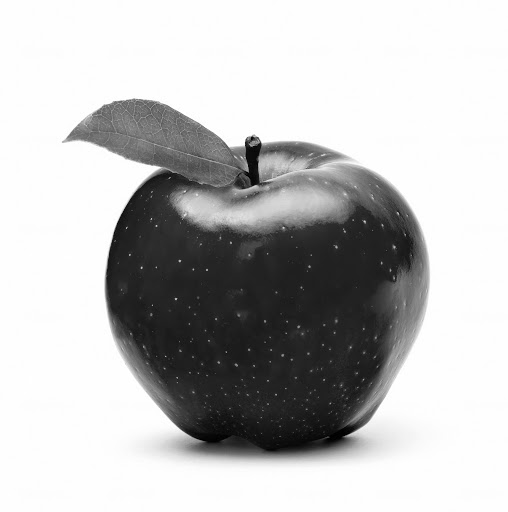

---------------
Filtrada
---------------


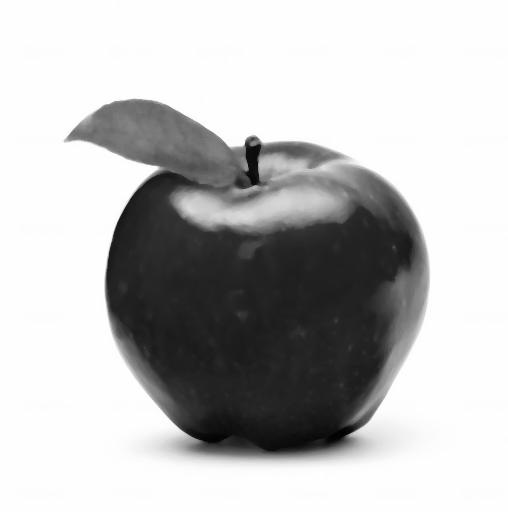

---------------
Filtrada umbralizada
---------------


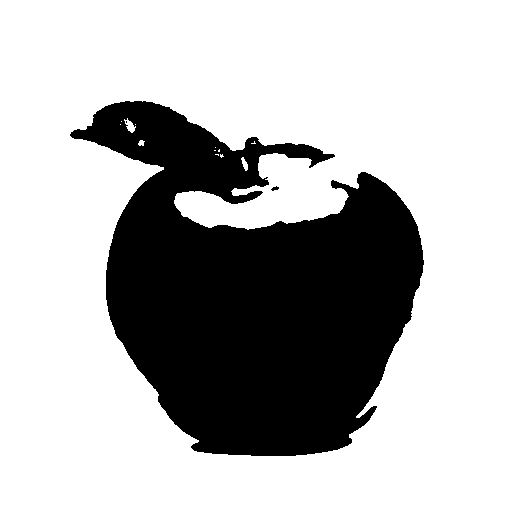

---------------
Filtrada umbralizada adaptativa por promedio
---------------


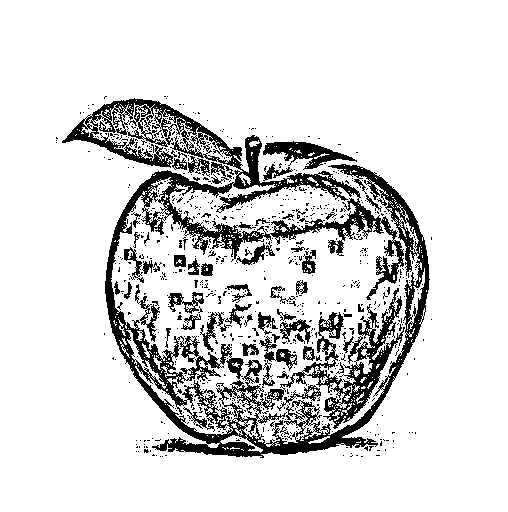

---------------
Filtrada umbralizada adaptativa gaussiano
---------------


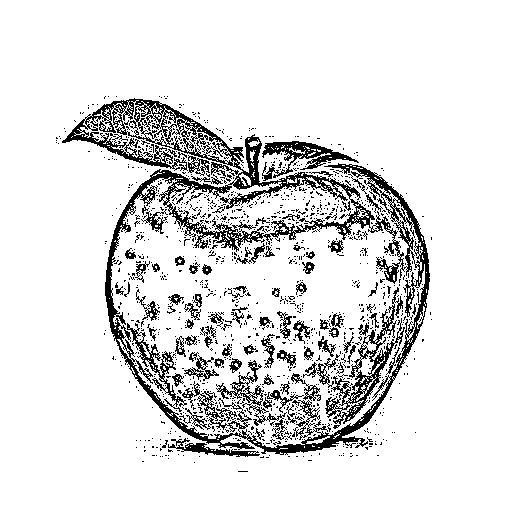

In [ ]:
imagen = 'manzana_roja.jpg'
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
# from matplotlib import pyplot as plt

# Leer la imagen
img = cv2.imread(imagen,0)
# Obtener la imagen al aplicarle un filtro
# de mediana 
img_filter = cv2.medianBlur(img,5)

print('---------------')
print('Original')
print('---------------')
cv2_imshow(img)

print('---------------')
print('Filtrada')
print('---------------')
cv2_imshow(img_filter)
# k = cv2.waitKey()

# Obtener una imagen umbralizada  de forma binaria con valores de 127 a 255
ret,th1 = cv2.threshold(img_filter,127,255,cv2.THRESH_BINARY)
print('---------------')
print('Filtrada umbralizada')
print('---------------')
cv2_imshow(th1)
# k = cv2.waitKey()

# Valor del umbralizado es el promedio del área del vecindario
# (imagen, valor máximo, método, tipo de umbralizado, tamaño_bloque, constate)
# El valor del umbral T(x,y) es el promedio de tamaño_bloque x tamaño_bloque de (x,y) menos C
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
print('---------------')
print('Filtrada umbralizada adaptativa por promedio')
print('---------------')
cv2_imshow(th2)
# k = cv2.waitKey()

# en este caso es una suma ponderada (correlación cruzada con una ventana Gaussiana) del tamaño_bloque x tamaño_bloque
# del vecindario (x,y) menos C. La sigma (desviación estándar) es utilizada como el tamaño_bloque
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
print('---------------')
print('Filtrada umbralizada adaptativa gaussiano')
print('---------------')
cv2_imshow(th3)
# k = cv2.waitKey()

# cv2.destroyAllWindows()

###Umbralización con Otsu y filtrado

---------------
Original
---------------


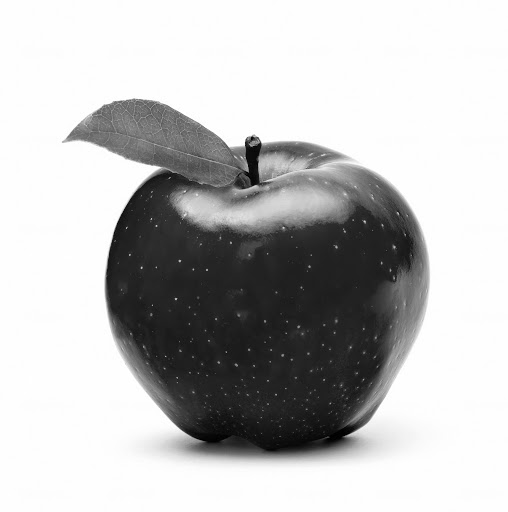

---------------
Umbralizacion
---------------


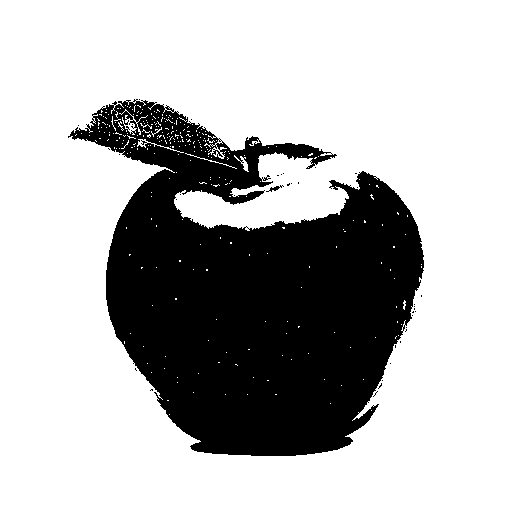

---------------
Umbralizacion Otsu
---------------


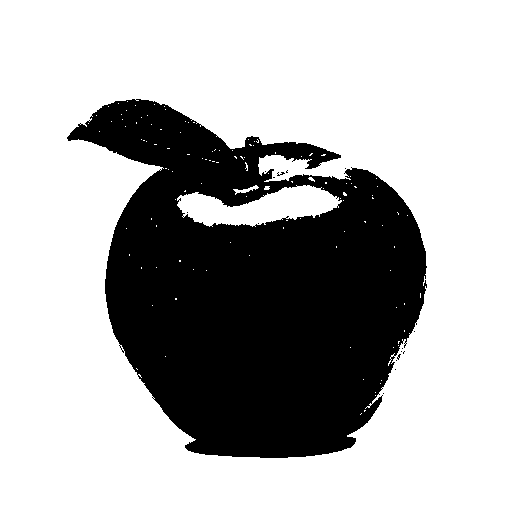

---------------
Umbralizacion Otsu Gaussiano
---------------


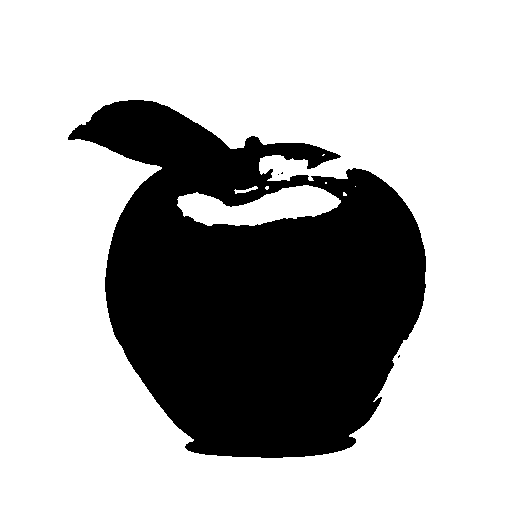

In [ ]:
imagen = 'manzana_roja.jpg'
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
#from matplotlib import pyplot as plt

# Leer la imagen
img = cv2.imread(imagen,0)
print('---------------')
print('Original')
print('---------------')
cv2_imshow(img)
# k = cv2.waitKey()

# Umbralización global
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
print('---------------')
print('Umbralizacion')
print('---------------')
cv2_imshow(th1)
# k = cv2.waitKey()

# Umbralización por Otsu
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('---------------')
print('Umbralizacion Otsu')
print('---------------')
cv2_imshow(th2)
# k = cv2.waitKey()

# Obtención de umbralización Otsu tras filtrado Gaussiano
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('---------------')
print('Umbralizacion Otsu Gaussiano')
print('---------------')
cv2_imshow(th3)
# k = cv2.waitKey()

# cv2.destroyAllWindows()